In [53]:
import numpy as np 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
#最大表示列数の指定（ここでは50列を指定）
pd.set_option('display.max_columns', 50)


訓練データとテストデータの読み込み

In [54]:
train = pd.read_csv("../data/train.csv", index_col="id")
test = pd.read_csv("../data/test.csv", index_col="id")


In [55]:
train.head()

,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
id,,,,,,,,,,,,,,,,,,,,,,,,,
0,A,80.10,material_7,material_8,9,5,7,8,4,18.040,12.518,15.748,19.292,11.739,20.155,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,A,84.89,material_7,material_8,9,5,14,3,3,18.213,11.540,17.717,17.893,12.748,17.889,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0
2,A,82.43,material_7,material_8,9,5,12,1,5,18.057,11.652,16.738,18.240,12.718,18.288,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0
3,A,101.07,material_7,material_8,9,5,13,2,6,17.295,11.188,18.576,18.339,12.583,19.060,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0
4,A,188.06,material_7,material_8,9,5,9,2,8,19.346,12.950,16.990,15.746,11.306,18.093,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0


In [56]:
test.head()

,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
id,,,,,,,,,,,,,,,,,,,,,,,,
26570,F,119.57,material_5,material_6,6,4,6,9,6,19.305,10.178,17.534,18.168,11.598,18.654,10.802,15.909,18.070,13.772,13.659,16.825,13.742,17.710,634.612
26571,F,113.51,material_5,material_6,6,4,11,8,0,17.883,11.927,17.228,16.033,11.179,19.368,12.032,13.998,NaN,12.473,17.468,16.708,14.776,14.102,537.037
26572,F,112.16,material_5,material_6,6,4,8,12,4,18.475,10.481,16.619,18.189,12.126,17.774,11.743,17.046,18.086,10.907,13.363,15.737,17.065,16.021,658.995
26573,F,112.72,material_5,material_6,6,4,8,11,10,16.518,10.888,15.293,18.592,11.304,18.948,11.790,18.165,16.163,10.933,15.501,15.667,12.620,16.111,594.301
26574,F,208.00,material_5,material_6,6,4,14,16,8,17.808,12.693,17.678,15.814,13.431,19.141,12.370,14.578,17.849,11.941,16.070,16.183,13.324,17.150,801.044


In [57]:
train.describe()


,loading,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
count,26320.000000,26570.000000,26570.000000,26570.000000,26570.000000,26570.000000,26189.000000,26032.000000,25894.000000,25774.000000,25633.000000,25522.000000,25343.000000,25270.000000,25102.000000,24969.000000,24796.000000,24696.000000,24561.000000,24460.000000,24286.000000,26570.000000
mean,127.826233,6.754046,7.240459,7.415883,8.232518,6.256568,17.791528,11.731988,17.127804,17.510759,11.716624,19.024714,11.430725,16.117711,19.172085,11.702464,15.652904,16.048444,14.995554,16.460727,701.269059,0.212608
std,39.030020,1.471852,1.456493,4.116690,4.199401,3.309109,1.001200,0.996085,0.996414,0.995980,1.000836,1.008591,0.999137,1.405978,1.520785,1.488838,1.155247,1.491923,1.549226,1.708935,123.304161,0.409160
min,33.160000,5.000000,5.000000,0.000000,0.000000,0.000000,13.968000,8.008000,12.073000,12.715000,7.968000,15.217000,7.537000,9.323000,12.461000,5.167000,10.890000,9.140000,9.104000,9.701000,196.787000,0.000000
25%,99.987500,6.000000,6.000000,4.000000,5.000000,4.000000,17.117000,11.051000,16.443000,16.839000,11.045000,18.340250,10.757000,15.209000,18.170000,10.703000,14.890000,15.057000,13.957000,15.268000,618.961500,0.000000
50%,122.390000,6.000000,8.000000,7.000000,8.000000,6.000000,17.787000,11.733000,17.132000,17.516000,11.712000,19.021000,11.430000,16.127000,19.211500,11.717000,15.628500,16.040000,14.969000,16.436000,701.024500,0.000000
75%,149.152500,8.000000,8.000000,10.000000,11.000000,8.000000,18.469000,12.410000,17.805000,18.178000,12.391000,19.708000,12.102000,17.025000,20.207000,12.709000,16.374000,17.082000,16.018000,17.628000,784.090250,0.000000
max,385.860000,9.000000,9.000000,29.000000,29.000000,24.000000,21.499000,16.484000,21.425000,21.543000,15.419000,23.807000,15.412000,22.479000,25.640000,17.663000,22.713000,22.303000,21.626000,24.094000,1312.794000,1.000000


In [58]:
test.describe()

,loading,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
count,20552.000000,20775.000000,20775.000000,20775.000000,20775.000000,20775.000000,20446.000000,20366.000000,20267.000000,20151.000000,20055.000000,19929.000000,19871.000000,19708.000000,19639.000000,19535.000000,19472.000000,19335.000000,19233.000000,19097.000000,19035.000000
mean,127.634895,7.733959,6.196823,7.453574,8.962407,6.126931,17.793466,11.727331,17.138080,17.515797,11.710919,19.030765,11.417921,16.123986,18.846571,11.914230,15.736104,16.123958,15.115915,16.636052,701.389816
std,39.154642,1.308535,1.917478,4.274477,4.334200,3.835881,1.002206,1.006834,1.008714,1.000067,1.001096,1.005401,0.999953,1.565414,1.588642,1.363253,1.357019,1.410569,1.545069,1.643463,130.205829
min,37.700000,6.000000,4.000000,0.000000,0.000000,0.000000,13.565000,7.384000,12.215000,13.539000,7.853000,14.885000,7.578000,9.167000,13.127000,6.116000,9.209000,8.415000,8.417000,10.162000,1.671000
25%,99.470000,6.000000,4.000000,4.000000,6.000000,3.000000,17.119000,11.048250,16.457000,16.847000,11.035000,18.351000,10.744000,15.095000,17.714000,11.069000,14.871000,15.238000,14.082000,15.512000,618.723500
50%,122.110000,7.000000,5.000000,7.000000,9.000000,6.000000,17.789000,11.729000,17.132000,17.510000,11.704000,19.040000,11.414000,16.109500,18.810000,11.941000,15.734000,16.119000,15.062000,16.706000,701.379000
75%,148.840000,9.000000,7.000000,10.000000,12.000000,8.000000,18.478000,12.411000,17.824500,18.197000,12.385000,19.707000,12.093000,17.156000,19.967500,12.791000,16.605000,17.001500,16.107000,17.781000,784.872500
max,385.570000,9.000000,9.000000,30.000000,33.000000,28.000000,21.389000,15.623000,21.681000,21.183000,15.828000,23.092000,15.091000,23.354000,24.950000,18.962000,21.677000,23.140000,22.097000,22.270000,1242.786000


False
False


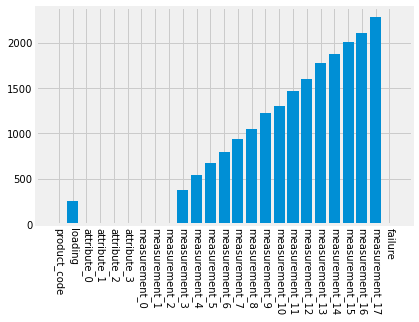

In [59]:
#欠損値がないか確認（nullが1つもなければ以下のprint文でTrueが出力される）
print(np.all(train.isnull().sum() == 0))
print(np.all(test.isnull().sum() == 0))

train_miss = train.isnull().sum()
plt.bar(train_miss.index, train_miss)
plt.xticks(rotation=270)
plt.show()


In [60]:
train_failure = train["failure"].value_counts()
train_failure


0    20921
1     5649
Name: failure, dtype: int64

In [61]:
train.groupby(['product_code', 'failure'])['failure'].count()


product_code  failure
A             0          3941
              1          1159
B             0          4198
              1          1052
C             0          4545
              1          1220
D             0          4000
              1          1112
E             0          4237
              1          1106
Name: failure, dtype: int64

In [62]:
def plot_hist(variable, data):
    plt.figure(figsize=(10, 3))
    plt.hist(data[variable], bins=25)
    plt.xlabel(variable)
    plt.ylabel("Values")
    plt.title("{} distribution with hist".format(variable))
    plt.show()


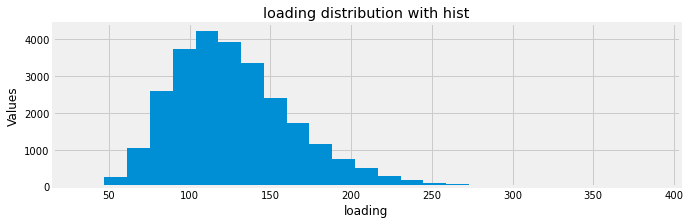

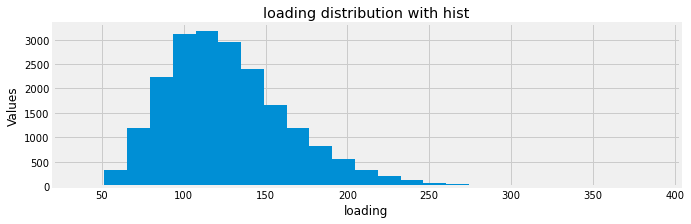

In [63]:
#labels = [label for label in train_data.columns if label not in ["id","failure"]]
#for label in labels:
plot_hist("loading", data=train)
plot_hist("loading", data=test)


c:\Users\keisu\anaconda3\envs\myenv2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\keisu\anaconda3\envs\myenv2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


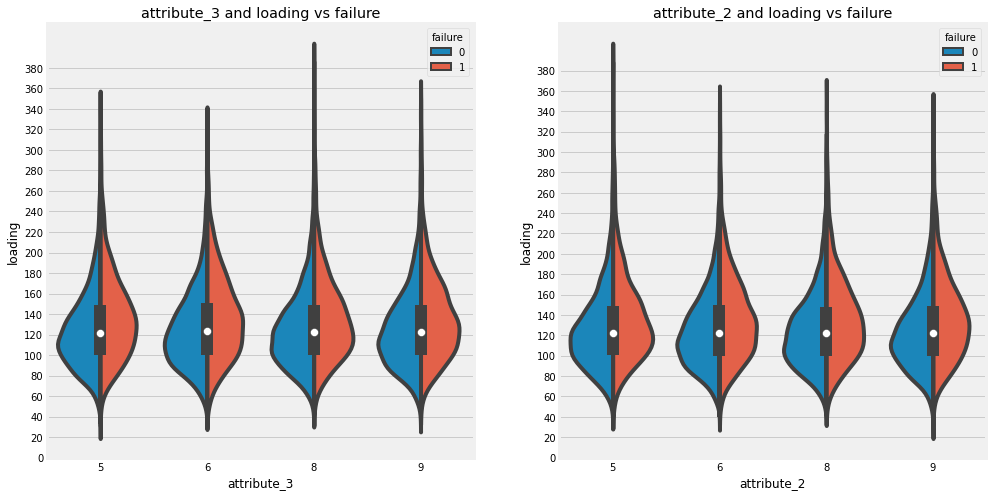

In [64]:
f, ax = plt.subplots(1, 2, figsize=(15, 8))
sns.violinplot("attribute_3", "loading", hue="failure",
               data=train, split=True, ax=ax[0])
ax[0].set_title('attribute_3 and loading vs failure')
ax[0].set_yticks(range(0, 400, 20))
sns.violinplot("attribute_2", "loading", hue="failure",
               data=train, split=True, ax=ax[1])
ax[1].set_title('attribute_2 and loading vs failure')
ax[1].set_yticks(range(0, 400, 20))
plt.show()


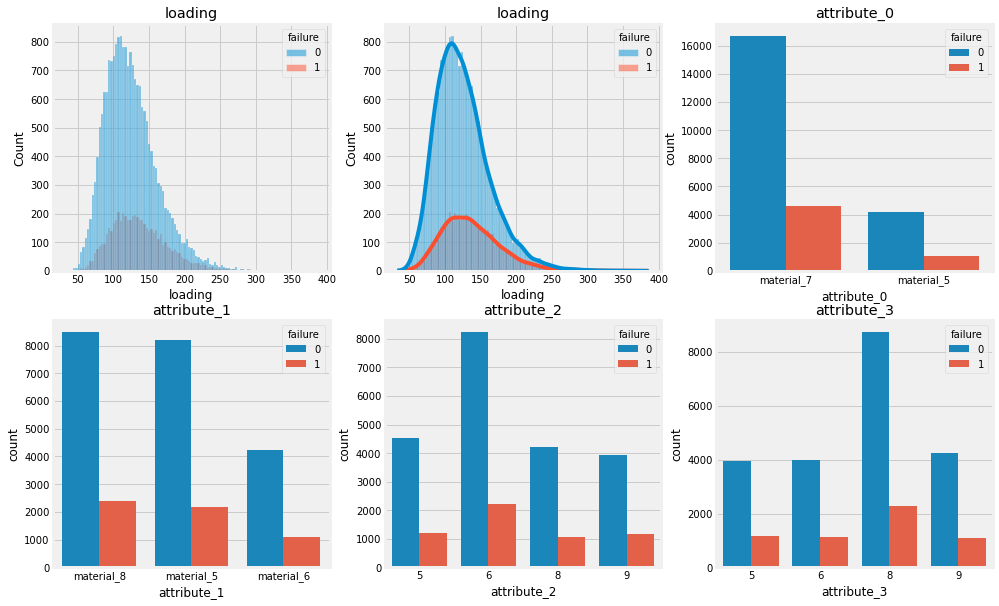

In [65]:
fig, ax = plt.subplots(2, 3)

fig.set_figheight(10)
fig.set_figwidth(15)

plt1 = sns.histplot(x="loading", data=train, hue="failure", ax=ax[0][0])
plt2 = sns.histplot(x="loading", kde=True, data=train,
                    hue="failure", ax=ax[0][1])
plt3 = sns.countplot(x="attribute_0", data=train,
                     hue="failure", ax=ax[0][2])
plt4 = sns.countplot(x="attribute_1", data=train,
                     hue="failure", ax=ax[1][0])
plt5 = sns.countplot(x="attribute_2", data=train,
                     hue="failure", ax=ax[1][1])
plt6 = sns.countplot(x="attribute_3", data=train,
                     hue="failure", ax=ax[1][2])

plt1.set_title("loading")
plt2.set_title("loading")
plt3.set_title("attribute_0")
plt4.set_title("attribute_1")
plt5.set_title("attribute_2")
plt6.set_title("attribute_3")

plt.show()


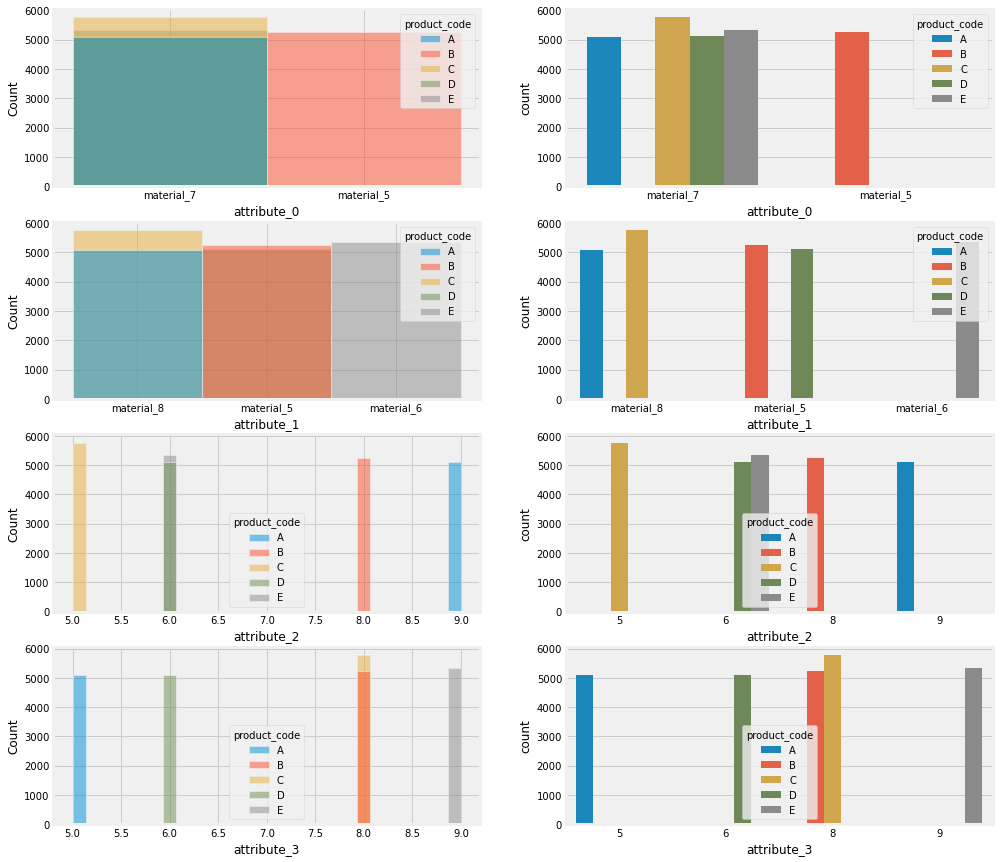

In [67]:
fig, ax = plt.subplots(4, 2)

fig.set_figheight(15)
fig.set_figwidth(15)

plt3 = sns.histplot(x="attribute_0", data=train,
                    hue="product_code", ax=ax[0][0])
plt4 = sns.countplot(x="attribute_0", data=train,
                     hue="product_code", ax=ax[0][1])
plt5 = sns.histplot(x="attribute_1", data=train,
                    hue="product_code", ax=ax[1][0])
plt6 = sns.countplot(x="attribute_1", data=train,
                     hue="product_code", ax=ax[1][1])
plt7 = sns.histplot(x="attribute_2", data=train,
                    hue="product_code", ax=ax[2][0])
plt8 = sns.countplot(x="attribute_2", data=train,
                     hue="product_code", ax=ax[2][1])
plt9 = sns.histplot(x="attribute_3", data=train,
                    hue="product_code", ax=ax[3][0])
plt10 = sns.countplot(x="attribute_3", data=train,
                      hue="product_code", ax=ax[3][1])

plt.show()


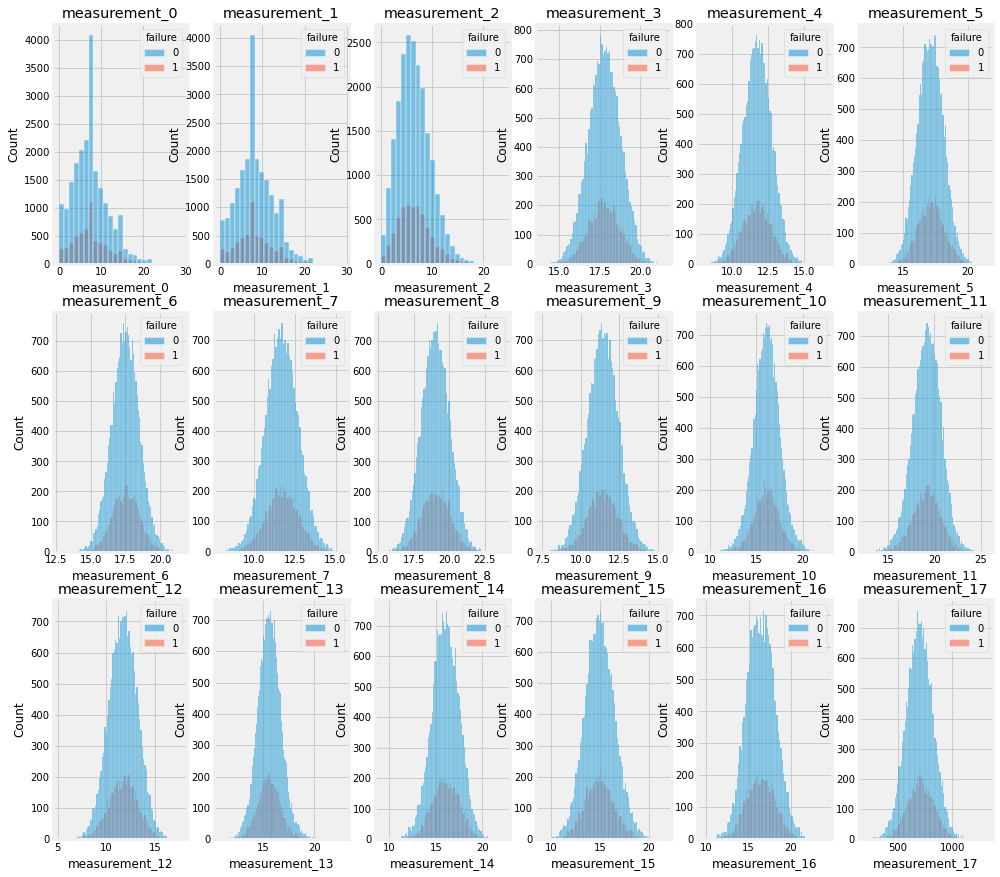

In [68]:
fig, ax = plt.subplots(3, 6)

fig.set_figheight(15)
fig.set_figwidth(15)

plt1 = sns.histplot(x="measurement_0", bins=25,
                    data=train, hue="failure", ax=ax[0][0])
plt2 = sns.histplot(x="measurement_1", bins=25,
                    data=train, hue="failure", ax=ax[0][1])
plt3 = sns.histplot(x="measurement_2", bins=25,
                    data=train, hue="failure", ax=ax[0][2])
plt4 = sns.histplot(x="measurement_3", data=train,
                    hue="failure", ax=ax[0][3])
plt5 = sns.histplot(x="measurement_4", data=train,
                    hue="failure", ax=ax[0][4])
plt6 = sns.histplot(x="measurement_5", data=train,
                    hue="failure", ax=ax[0][5])
plt7 = sns.histplot(x="measurement_6", data=train,
                    hue="failure", ax=ax[1][0])
plt8 = sns.histplot(x="measurement_7", data=train,
                    hue="failure", ax=ax[1][1])
plt9 = sns.histplot(x="measurement_8", data=train,
                    hue="failure", ax=ax[1][2])
plt10 = sns.histplot(x="measurement_9", data=train,
                     hue="failure", ax=ax[1][3])
plt11 = sns.histplot(x="measurement_10", data=train,
                     hue="failure", ax=ax[1][4])
plt12 = sns.histplot(x="measurement_11", data=train,
                     hue="failure", ax=ax[1][5])
plt13 = sns.histplot(x="measurement_12", data=train,
                     hue="failure", ax=ax[2][0])
plt14 = sns.histplot(x="measurement_13", data=train,
                     hue="failure", ax=ax[2][1])
plt15 = sns.histplot(x="measurement_14", data=train,
                     hue="failure", ax=ax[2][2])
plt16 = sns.histplot(x="measurement_15", data=train,
                     hue="failure", ax=ax[2][3])
plt17 = sns.histplot(x="measurement_16", data=train,
                     hue="failure", ax=ax[2][4])
plt18 = sns.histplot(x="measurement_17", data=train,
                     hue="failure", ax=ax[2][5])

plt1.set_title("measurement_0")
plt2.set_title("measurement_1")
plt3.set_title("measurement_2")
plt4.set_title("measurement_3")
plt5.set_title("measurement_4")
plt6.set_title("measurement_5")
plt7.set_title("measurement_6")
plt8.set_title("measurement_7")
plt9.set_title("measurement_8")
plt10.set_title("measurement_9")
plt11.set_title("measurement_10")
plt12.set_title("measurement_11")
plt13.set_title("measurement_12")
plt14.set_title("measurement_13")
plt15.set_title("measurement_14")
plt16.set_title("measurement_15")
plt17.set_title("measurement_16")
plt18.set_title("measurement_17")

plt.show()
